In [ ]:
pip install finterstellar

In [135]:
import finterstellar as fs
import pandas as pd

In [250]:
# OTP 얻기
MyOtp = 16506196101081179910

In [255]:
# 재무재표 가져오기
# 분기 데이터인 경우 window='Q', 1년치 데이터 windwos='T'
df = fs.fn_single(otp=MyOtp, symbol='COST', window='T')
#df.to_csv('test.csv')

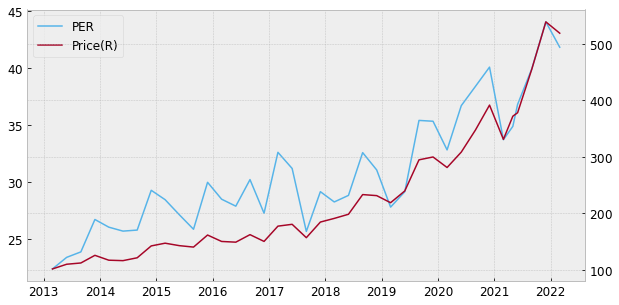

In [256]:
# PER 추가. 해당 사이트에서 제공하는 재무재표에는 PER 항목이 없음.
# 실제 주식 가격과 PER을 비교
df['PER'] = df['Price'] / df['EPS']
fs.draw_chart(df, left='PER', right='Price')

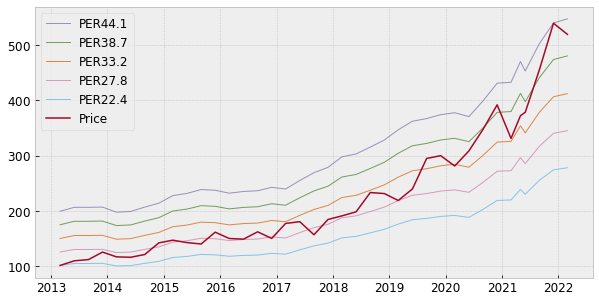

In [257]:
# 최대/최소 PER을 기준으로 PER의 변동을 보여줄 수 있다.
fs.draw_price_multiple_band(df, multiple='PER', acct='EPS')

In [141]:
df = fs.fn_consolidated(otp=MyOtp, term='2020Q3', vol=100000, study='Y')
print(df.head(3))

2020Q3... For Study. Freezed at the end of July 2021. OK
          term  Revenue     COGS  Gross Profit     SG&A  Operating Income  \
symbol                                                                      
A       2020Q3 5,223.00 2,437.00      2,786.00 1,494.00            797.00   
AA      2020Q3 9,330.00 8,043.00      1,287.00   213.00            -23.00   
AAIC    2020Q3    64.77     0.00         64.77    12.56             11.16   

        Net Income   EPS   EBITDA   EBIT  ...  Financing Cash Flow  Price  \
symbol                                    ...                               
A           691.00  2.26 1,105.00 797.00  ...                49.00 100.94   
AA         -469.00 -2.53   643.00 -23.00  ...               484.00  11.63   
AAIC        -54.80 -1.52    62.76  52.21  ...            -3,220.76   2.84   

        Price_M1  Price_M2  Price_M3                                     name  \
symbol                                                                          
A        

In [142]:
df.columns

Index(['term', 'Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing Cash Flow', 'Dividend', 'Financing Cash Flow', 'Price',
       'Price_M1', 'Price_M2', 'Price_M3', 'name', 'name_kr', 'sector',
       'industry', 'avg_volume'],
      dtype='object')

In [143]:
df['PER'] = df['Price'] / df['EPS']
df['PER']

symbol
A       44.66
AA      -4.60
AAIC    -1.87
AAL     -0.89
AAOI    -2.88
        ...  
ZUMZ    11.40
ZUO    -14.99
ZVO     -7.55
ZYME   -10.02
ZYXI    56.29
Name: PER, Length: 3021, dtype: float64

In [144]:
terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')   # trade term to fiscal terms
terms

Index(['2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'], dtype='object')

In [264]:
data_2019Q4 = fs.fn_consolidated(otp=MyOtp, term='2019Q4')
#data_2020Q1 = fs.fn_consolidated(otp=MyOtp, term='2020Q1')
#data_2020Q2 = fs.fn_consolidated(otp=MyOtp, term='2020Q2')
#data_2020Q3 = fs.fn_consolidated(otp=MyOtp, term='2020Q3')
#data_2020Q4 = fs.fn_consolidated(otp=MyOtp, term='2020Q4')

2019Q4...OK


In [265]:
data_2019Q4.to_csv('all.csv')

In [146]:
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=MyOtp, term=t)

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [147]:
print(data['2020Q3'])

          term   Revenue      COGS  Gross Profit     SG&A  Operating Income  \
symbol                                                                        
A       2020Q3  5,223.00  2,437.00      2,786.00 1,494.00            797.00   
AA      2020Q3  9,330.00  8,043.00      1,287.00   213.00            -23.00   
AADI    2020Q3     15.23      0.05         15.19     6.52             -2.18   
AAIC    2020Q3     64.77      0.00         64.77    12.56             11.16   
AAL     2020Q3 24,623.00 24,753.00       -130.00 1,348.00         -7,177.00   
...        ...       ...       ...           ...      ...               ...   
ZUO     2020Q3    291.10    133.82        157.28   164.34            -82.66   
ZVO     2020Q3    400.26     52.45        347.81    90.39            -25.78   
ZWS     2020Q3  1,981.40  1,211.80        769.60   419.80            718.10   
ZYME    2020Q3     25.15    176.52       -151.37    72.31           -223.68   
ZYXI    2020Q3     68.68     14.58         54.10    

In [148]:
for t in terms:
    data[t]['PER'] = data[t]['Price'] / data[t]['EPS']

In [149]:
s = {}
signal = {}
for t in terms:
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
signal['2019Q4']

['LBTYK',
 'RVI',
 'FENG',
 'LBTYA',
 'SWN',
 'BBAR',
 'AIV',
 'PAM',
 'CRON',
 'NRG',
 'FINV',
 'GTX',
 'QD',
 'REGI',
 'PKE',
 'YRD',
 'BPT',
 'STAR',
 'SND',
 'LXRX',
 'LGND',
 'JFIN',
 'ARLP',
 'PBI',
 'HCC',
 'HSC',
 'SUPV',
 'MUR',
 'QFIN',
 'VNO']

In [150]:
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 57.94%
Accumulated return: 57.94%
Investment period: 1.0yrs
Sharpe ratio: 1.31
MDD: -12.76%


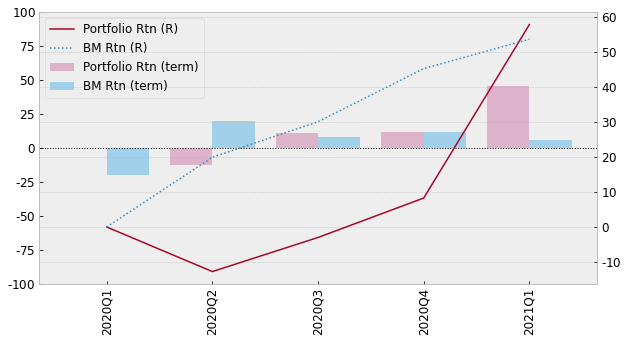

In [151]:
fs.draw_return(df)

In [152]:
# terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['PER'] = data[t]['Price'] / data[t]['EPS']
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 57.94%
Accumulated return: 57.94%
Investment period: 1.0yrs
Sharpe ratio: 1.31
MDD: -12.76%


In [153]:
# 5.3 PBR

In [154]:
# import finterstellar as fs

In [155]:
df = fs.fn_single(otp=MyOtp, symbol='JBLU', window='T')

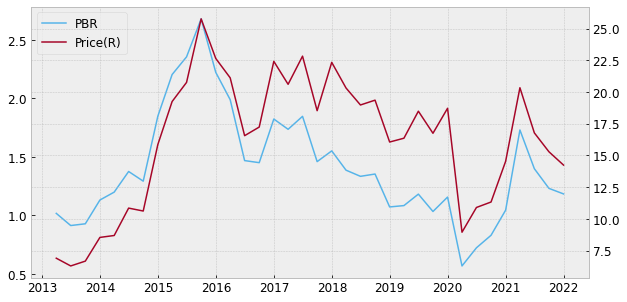

In [156]:
df['BPS'] = df['Shareholders Equity'] / df['Shares']
df['PBR'] = df['Price'] / df['BPS']
fs.draw_chart(df, left='PBR', right='Price')

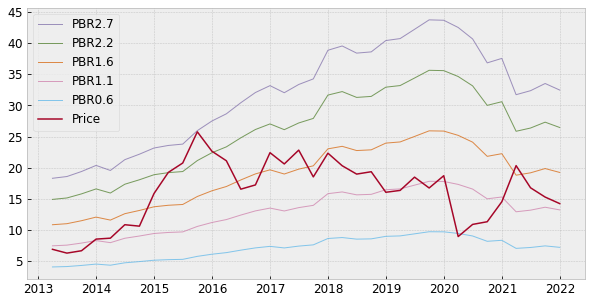

In [157]:
fs.draw_price_multiple_band(df, multiple='PBR', acct='BPS')

In [158]:
# terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp=MyOtp, term=t)
s = {}
signal = {}
for t in terms:
    data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
    data[t]['PBR'] = data[t]['Price'] / data[t]['BPS']
    s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=2, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 210.45%
Accumulated return: 210.45%
Investment period: 1.0yrs
Sharpe ratio: 3.95
MDD: 0.00%


In [159]:
signal['2020Q3']

['LXU',
 'TNP',
 'HNRG',
 'REI',
 'GNW',
 'APWC',
 'SMHI',
 'CRESY',
 'AR',
 'NBR',
 'TUSK',
 'PEI',
 'FSTX',
 'BHF',
 'BBGI',
 'FET',
 'HGSH',
 'CDR',
 'XYF',
 'CPE',
 'APTS',
 'TCOM',
 'GLOP',
 'WPG',
 'SND',
 'YPF',
 'XIN',
 'SALM',
 'QD',
 'MHLD']

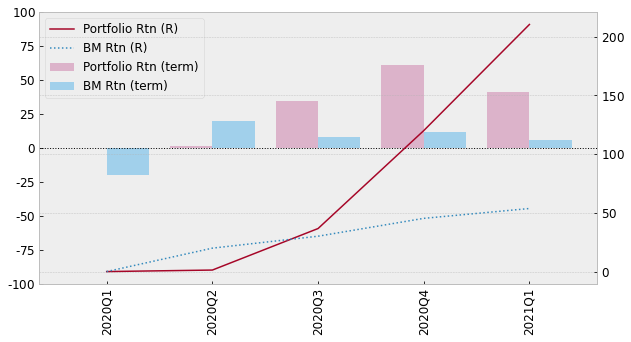

In [160]:
fs.draw_return(df)

In [161]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 559.97%
Accumulated return: 559.97%
Investment period: 1.0yrs
Sharpe ratio: 7.46
MDD: 0.00%


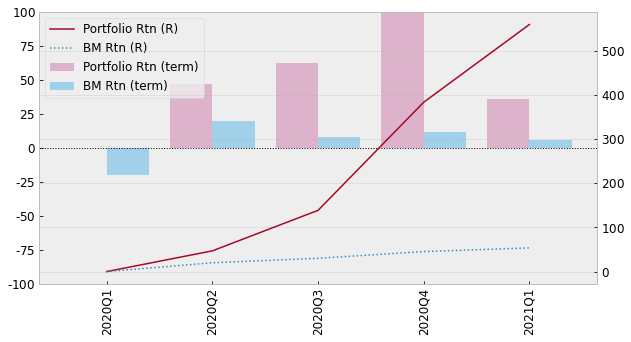

In [162]:
fs.draw_return(df)

In [163]:
# 5.4 PSR

In [164]:
df = fs.fn_single(otp=MyOtp, symbol='WMT', window='T')

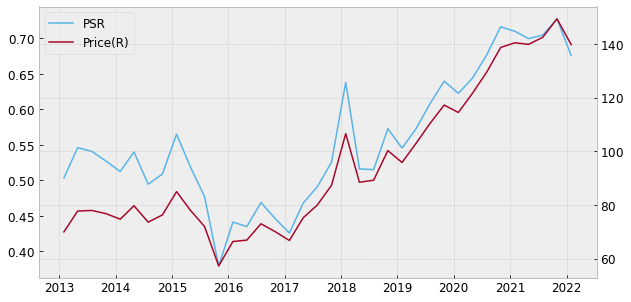

In [165]:
df['SPS'] = df['Revenue'] / df['Shares']
df['PSR'] = df['Price'] / df['SPS']
fs.draw_chart(df, left='PSR', right='Price')

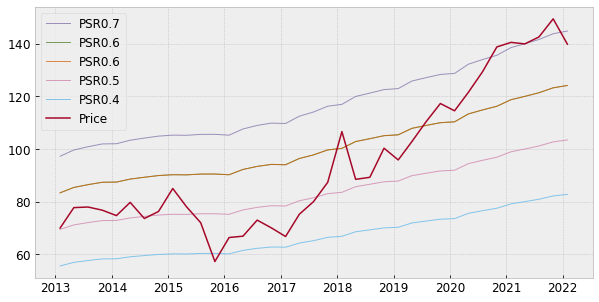

In [166]:
fs.draw_price_multiple_band(df, multiple='PSR', acct='SPS')

In [167]:
# terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['SPS'] = data[t]['Revenue'] / data[t]['Shares']
    data[t]['PSR'] = data[t]['Price_M3'] / data[t]['SPS']
    s[t] = fs.fn_filter(data[t], by='PSR', floor=.1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 344.54%
Accumulated return: 344.54%
Investment period: 1.0yrs
Sharpe ratio: 6.10
MDD: 0.00%


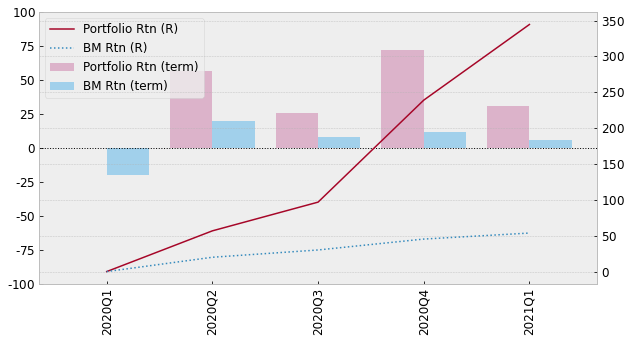

In [168]:
fs.draw_return(df)

In [169]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=MyOtp, term=t)
s = {}
signal = {}
for t in terms:
    data[t]['SPS'] = data[t]['Revenue'] / data[t]['Shares']
    data[t]['PSR'] = data[t]['Price_M3'] / data[t]['SPS']
    s[t] = fs.fn_filter(data[t], by='PSR', floor=.1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 32.77%
Accumulated return: 1605.69%
Investment period: 10.0yrs
Sharpe ratio: 4.29
MDD: -35.17%


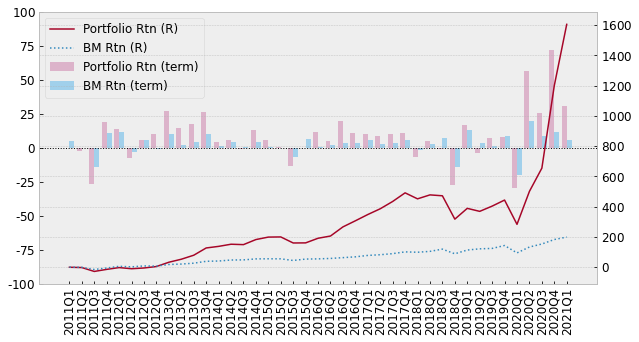

In [170]:
fs.draw_return(df)

In [171]:
# 5.5 PCR

In [172]:
df = fs.fn_single(otp=MyOtp, symbol='MCD', window='T')

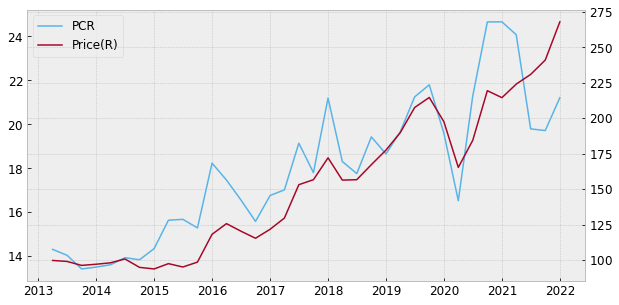

In [173]:
df['OCF'] = df['Net Income'] + df['Depreciation']
df['CFPS'] = df['OCF'] / df['Shares']
df['PCR'] = df['Price'] / df['CFPS']
fs.draw_chart(df, left='PCR', right='Price')

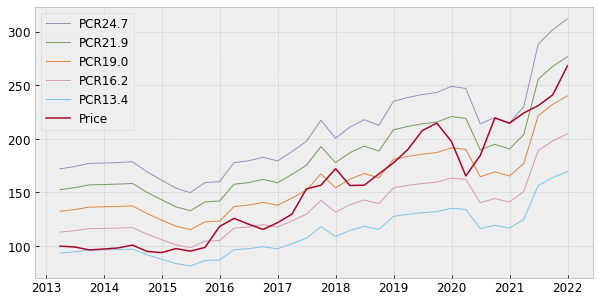

In [174]:
fs.draw_price_multiple_band(df, multiple='PCR', acct='CFPS')

In [175]:
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['CFPS'] = ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares']
    data[t]['PCR'] = data[t]['Price_M3'] / data[t]['CFPS']
    s[t] = fs.fn_filter(data[t], by='PCR', floor=.1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 15.81%
Accumulated return: 334.34%
Investment period: 10.0yrs
Sharpe ratio: 0.77
MDD: -53.77%


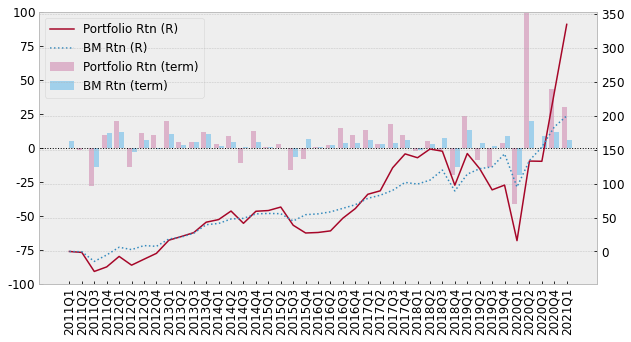

In [176]:
fs.draw_return(df)

In [177]:
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['CFPS'] = ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares']
    data[t]['PCR'] = data[t]['Price_M3'] / data[t]['CFPS']
    s[t] = fs.fn_filter(data[t], by='PCR', floor=.1, cap=10, n=10, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 25.82%
Accumulated return: 895.78%
Investment period: 10.0yrs
Sharpe ratio: 1.72
MDD: -44.38%


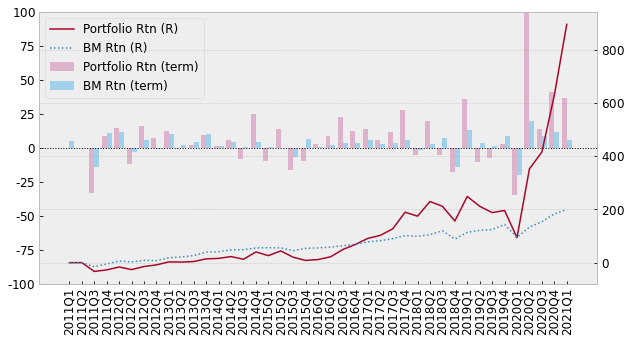

In [178]:
fs.draw_return(df)

In [179]:
# PER, PBR

In [180]:
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['PER'] = data[t]['Price'] / data[t]['EPS']
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 6.15%
Accumulated return: 81.75%
Investment period: 10.0yrs
Sharpe ratio: 0.30
MDD: -55.70%


In [181]:
s = {}
signal = {}
for t in terms:
    data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
    data[t]['PBR'] = data[t]['Price'] / data[t]['BPS']
    s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 38.11%
Accumulated return: 2431.90%
Investment period: 10.0yrs
Sharpe ratio: 4.70
MDD: -35.74%


In [182]:
# 5.6 Combine signal

In [183]:
t = '2020Q3'
data = fs.fn_consolidated(otp=MyOtp, term=t, vol=0)
data['PER'] = data['Price_M3'] / data['EPS']
data['PBR'] = data['Price_M3'] / (data['Shareholders Equity']/data['Shares'])
s1 = fs.fn_filter(data, by='PER', floor=1, cap=10, n=10, asc=True)
s2 = fs.fn_filter(data, by='PBR', floor=.1, cap=1, n=10, asc=True)

2020Q3...OK


In [184]:
print(s1)

        PER
symbol     
VHC    1.25
UIS    1.35
JOB    1.54
MX     1.58
SND    1.58
VTOL   1.61
TNK    1.66
GTX    1.74
LIVE   1.92
BMA    1.94


In [185]:
print(s2)

        PBR
symbol     
REI    0.10
ACOR   0.10
TNP    0.11
LTRPA  0.12
BORR   0.12
RIG    0.12
GNW    0.13
SISI   0.14
GLOP   0.14
GURE   0.15


In [186]:
print(fs.combine_signal(s1, s2, how='and'))

Empty DataFrame
Columns: [PER, PBR]
Index: []


In [187]:
print(fs.combine_signal(s1, s2, how='or'))

        PER  PBR
symbol          
ACOR    NaN 0.10
BMA    1.94  NaN
BORR    NaN 0.12
GLOP    NaN 0.14
GNW     NaN 0.13
GTX    1.74  NaN
GURE    NaN 0.15
JOB    1.54  NaN
LIVE   1.92  NaN
LTRPA   NaN 0.12
MX     1.58  NaN
REI     NaN 0.10
RIG     NaN 0.12
SISI    NaN 0.14
SND    1.58  NaN
TNK    1.66  NaN
TNP     NaN 0.11
UIS    1.35  NaN
VHC    1.25  NaN
VTOL   1.61  NaN


In [188]:
s1 = fs.fn_score(data, by='PER', method='absolute', floor=1, cap=10, asc=True)
s2 = fs.fn_score(data, by='PBR', method='absolute', floor=.1, cap=1, asc=True)

In [189]:
print(s1)

        PER  Score
symbol            
VHC    1.25  97.20
UIS    1.35  96.10
JOB    1.54  94.00
MX     1.58  93.60
SND    1.58  93.60
...     ...    ...
CIVI   9.91   1.00
LCNB   9.93   0.80
RDN    9.93   0.80
FISI   9.96   0.50
EBTC   9.98   0.20

[293 rows x 2 columns]


In [190]:
print(s2)

        PBR  Score
symbol            
REI    0.10  99.60
ACOR   0.10  99.40
TNP    0.11  99.40
LTRPA  0.12  98.30
BORR   0.12  97.80
...     ...    ...
STCN   1.00   0.30
SITC   1.00   0.30
FCF    1.00   0.20
TEVA   1.00   0.20
CRS    1.00   0.10

[810 rows x 2 columns]


In [191]:
print(fs.combine_score(s1, s2, n=10))

        Score  Score_   Sum
symbol                     
SND     46.80   42.40 89.20
TNK     46.35   37.65 84.00
STNG    36.90   39.60 76.50
PVL     37.10   37.20 74.30
LIVE    44.90   28.60 73.50
AEL     39.25   32.50 71.75
JOB     47.00   24.70 71.70
TNP     20.70   49.70 70.40
BMA     44.75   25.40 70.15
TRMD    36.80   33.20 70.00


In [192]:
s1 = fs.fn_score(data, by='PER', method='relative', floor=1, cap=10, asc=True)
s2 = fs.fn_score(data, by='PBR', method='relative', floor=.1, cap=1, asc=True)

In [193]:
print(s1)

        PER  Score
symbol            
VHC    1.25 100.00
UIS    1.35  99.70
JOB    1.54  99.30
MX     1.58  99.00
SND    1.58  98.60
...     ...    ...
CIVI   9.91   1.70
LCNB   9.93   1.40
RDN    9.93   1.00
FISI   9.96   0.70
EBTC   9.98   0.30

[293 rows x 2 columns]


In [194]:
print(s2)

        PBR  Score
symbol            
REI    0.10 100.00
ACOR   0.10  99.90
TNP    0.11  99.80
LTRPA  0.12  99.60
BORR   0.12  99.50
...     ...    ...
STCN   1.00   0.60
SITC   1.00   0.50
FCF    1.00   0.40
TEVA   1.00   0.20
CRS    1.00   0.10

[810 rows x 2 columns]


In [195]:
print(fs.combine_score(s1, s2, n=10))

        Score  Score_   Sum
symbol                     
SND     49.30   47.65 96.95
TNK     49.00   45.60 94.60
STNG    44.35   46.50 90.85
PVL     44.55   45.35 89.90
LIVE    48.65   40.30 88.95
AEL     45.40   42.60 88.00
TRMD    44.20   43.25 87.45
JOB     49.65   37.65 87.30
BMA     48.45   38.15 86.60
INSW    43.35   42.55 85.90


In [196]:
# 5.7 가치투자 4대장 콤보

In [197]:
# pip install finterstellar

In [198]:
import finterstellar as fs

In [199]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
terms

Index(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
       '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1',
       '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
       '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
       '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
       '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'],
      dtype='object')

In [200]:
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=MyOtp, term=t)   

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [201]:
print(data['2020Q3'])

          term   Revenue      COGS  Gross Profit     SG&A  Operating Income  \
symbol                                                                        
A       2020Q3  5,223.00  2,437.00      2,786.00 1,494.00            797.00   
AA      2020Q3  9,330.00  8,043.00      1,287.00   213.00            -23.00   
AADI    2020Q3     15.23      0.05         15.19     6.52             -2.18   
AAIC    2020Q3     64.77      0.00         64.77    12.56             11.16   
AAL     2020Q3 24,623.00 24,753.00       -130.00 1,348.00         -7,177.00   
...        ...       ...       ...           ...      ...               ...   
ZUO     2020Q3    291.10    133.82        157.28   164.34            -82.66   
ZVO     2020Q3    400.26     52.45        347.81    90.39            -25.78   
ZWS     2020Q3  1,981.40  1,211.80        769.60   419.80            718.10   
ZYME    2020Q3     25.15    176.52       -151.37    72.31           -223.68   
ZYXI    2020Q3     68.68     14.58         54.10    

In [202]:
for t in terms:    
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )

In [203]:
print(data['2020Q4'].sort_values(by='Market Cap', ascending=False).head())

          term    Revenue       COGS  Gross Profit      SG&A  \
symbol                                                         
AAPL    2020Q4 294,239.00 179,823.00    114,416.00 20,350.00   
MSFT    2020Q4 153,284.00  48,510.00    104,774.00 24,693.00   
AMZN    2020Q4 386,064.00 233,307.00    152,757.00 87,194.00   
GOOGL   2020Q4 182,527.00  84,732.00     97,795.00 28,998.00   
GOOG    2020Q4 182,528.00  84,732.00     97,796.00 28,998.00   

        Operating Income  Net Income   EPS    EBITDA      EBIT  ...  \
symbol                                                          ...   
AAPL           74,253.00   63,930.00  3.72 85,508.00 74,253.00  ...   
MSFT           60,155.00   51,310.00  6.78 72,183.00 60,155.00  ...   
AMZN           22,899.00   21,331.00 42.30 47,654.00 22,899.00  ...   
GOOGL          41,224.00   40,269.00 59.26 54,921.00 41,224.00  ...   
GOOG           41,224.00   40,269.00 59.02 54,922.00 41,224.00  ...   

                        name      name_kr            

In [204]:
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
for t in terms:  
    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)

In [205]:
s6 = {}
for t in terms:      
    s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t])

In [206]:
s = {}
signal = {}
for t in terms:      
    s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50)
    signal[t] = list(s[t].index)

In [207]:
print(signal['2020Q3'])

['JOB', 'TNK', 'TNP', 'DXYN', 'SND', 'VRS', 'STNG', 'OSG', 'ASC', 'ARC', 'DLNG', 'HAPP', 'MESA', 'OPY', 'VIA', 'YRD', 'QD', 'AP', 'ELVT', 'CNSL', 'COWN', 'INSW', 'FINV', 'ORN', 'BGFV', 'BZH', 'NAT', 'VTOL', 'CUBI', 'CLW', 'ASUR', 'RYAM', 'CIVI', 'SGU', 'ENVA', 'LEJU', 'VHC', 'MX', 'HRTG', 'LPG', 'AMRX', 'KOP', 'RTLR', 'DX', 'STRL', 'HAFC', 'SCPL', 'CO', 'QIWI', 'HLX']


In [208]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 11.43%
Accumulated return: 195.51%
Investment period: 10.0yrs
Sharpe ratio: 0.63
MDD: -48.92%


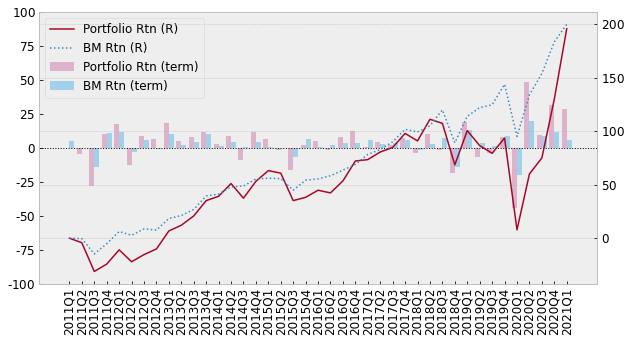

In [209]:
fs.draw_return(df)

In [210]:
# 4대장 + 소형주
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )
    
    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True)
    s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
    
    s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t])
    s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 11.43%
Accumulated return: 195.51%
Investment period: 10.0yrs
Sharpe ratio: 0.63
MDD: -48.92%


In [211]:
# 4대장 + 대형주
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}
s6 = {}
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']    
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares'])
    data[t]['PCR'] = data[t]['Price_M3'] / ( ( data[t]['Net Income'] + data[t]['Depreciation'] ) / data[t]['Shares'] )
    
    s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=False)
    s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True)
    s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True)
    s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True)
    s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True)
    
    s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t])
    s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 5.22%
Accumulated return: 66.36%
Investment period: 10.0yrs
Sharpe ratio: 0.27
MDD: -47.39%


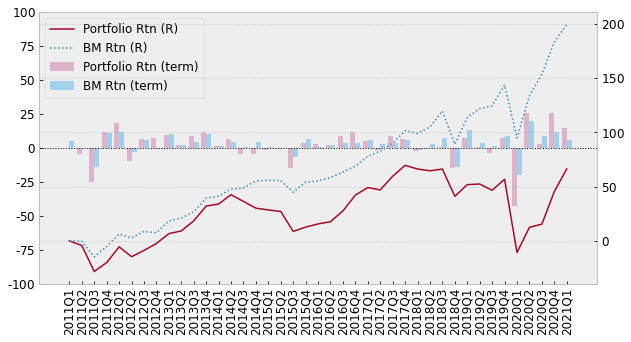

In [212]:
fs.draw_return(df)

In [213]:
# 5.8 EV/EBITDA, EV/Sales

In [214]:
df = fs.fn_single(otp=MyOtp, symbol='NKE', window='T')

In [215]:
df['Market Cap'] = df['Price'] * df['Shares']    
df['EV'] = df['Market Cap'] + df['Long Term Debt'] + df['Current Debt'] - df['Cash & Equivalents']

In [216]:
df['EV/EBITDA'] = df['EV'] / df['EBITDA']

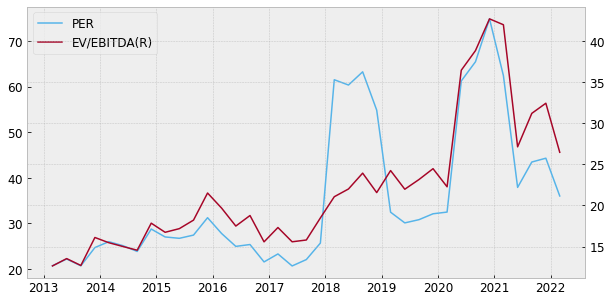

In [217]:
df['PER'] = df['Price'] / df['EPS']
fs.draw_chart(df, left='PER', right='EV/EBITDA')

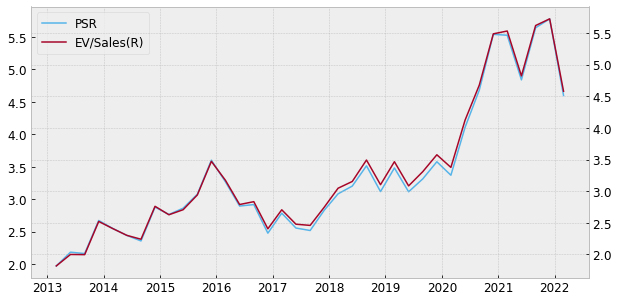

In [218]:
df['EV/Sales'] = df['EV'] / df['Revenue']
df['PSR'] = df['Price'] / (df['Revenue']/df['Shares'])
fs.draw_chart(df, left='PSR', right='EV/Sales')

In [219]:
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)

In [220]:
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents']

In [221]:
for t in terms:
    data[t]['EV/EBITDA'] = data[t]['EV'] / data[t]['EBITDA']
    data[t].loc[(data[t]['EV']<=0) | (data[t]['EBITDA']<=0), 'EV/EBITDA'] = float('nan')

In [222]:
s = {}
signal = {}
for t in terms:
    s[t] = fs.fn_filter(data[t], by='EV/EBITDA', floor=0, n=30, asc=True)
    signal[t] = list(s[t].index)

In [223]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)  

CAGR: 9.03%
Accumulated return: 137.61%
Investment period: 10.0yrs
Sharpe ratio: 0.45
MDD: -51.88%


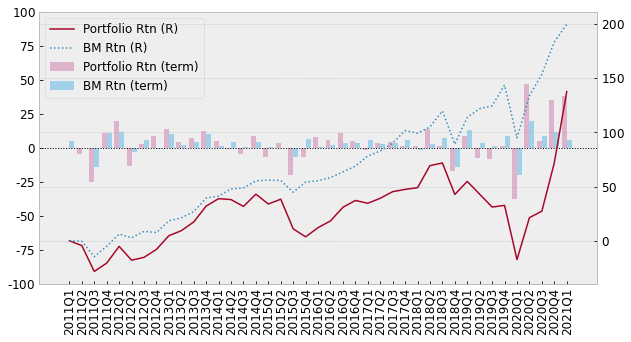

In [224]:
fs.draw_return(df)

In [225]:
# EV/EBITDA
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents']
    data[t]['EV/EBITDA'] = data[t]['EV'] / data[t]['EBITDA']
    data[t].loc[(data[t]['EV']<=0) | (data[t]['EBITDA']<=0), 'EV/EBITDA'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='EV/EBITDA', floor=0, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)  

CAGR: 9.03%
Accumulated return: 137.61%
Investment period: 10.0yrs
Sharpe ratio: 0.45
MDD: -51.88%


CAGR: 25.28%
Accumulated return: 853.84%
Investment period: 10.0yrs
Sharpe ratio: 2.66
MDD: -26.06%


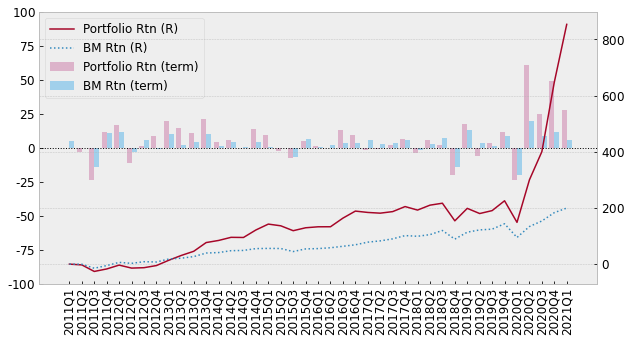

In [226]:
# EV/Sales
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']    
    data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents']
    data[t]['EV/Sales'] = data[t]['EV'] / data[t]['Revenue']
    data[t].loc[(data[t]['EV']<=0) | (data[t]['Revenue']<=0), 'EV/Sales'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='EV/Sales', floor=0, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)  
fs.draw_return(df)

In [227]:
#5.9 NCAV

In [228]:
df = fs.fn_single(otp=MyOtp, symbol='FB', window='T')

In [229]:
df['NCAV'] = df['Current Assets'] - df['Total Liabilities']

In [230]:
df['Market Cap'] = df['Price'] * df['Shares'] 

In [231]:
df['Safety Margin'] = df['NCAV'] - df['Market Cap']*1.5

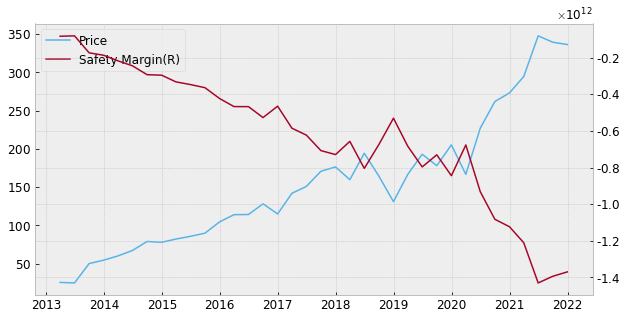

In [232]:
fs.draw_chart(df, left='Price', right='Safety Margin')

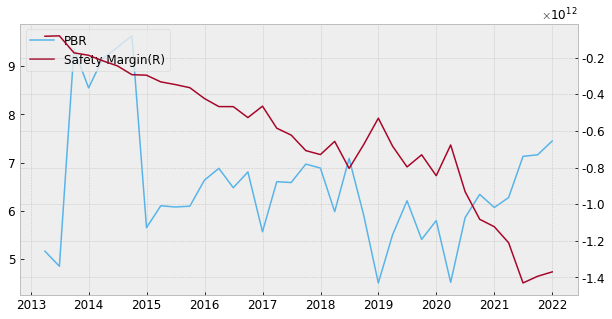

In [233]:
df['PBR'] = df['Price'] / (df['Shareholders Equity']/df['Shares'])
fs.draw_chart(df, left='PBR', right='Safety Margin')

In [234]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=MyOtp, term=t, vol=10000)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [235]:
for t in terms:   
    data[t]['NCAV'] = data[t]['Current Assets'] - data[t]['Total Liabilities']
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']
    data[t]['Safety Margin'] = data[t]['NCAV'] - data[t]['Market Cap']*1.5

In [236]:
s = {}
signal = {}
for t in terms:
    s[t] = fs.fn_filter(data[t], by='Safety Margin', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)

In [237]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 27.32%
Accumulated return: 1021.61%
Investment period: 10.0yrs
Sharpe ratio: 3.33
MDD: -11.85%


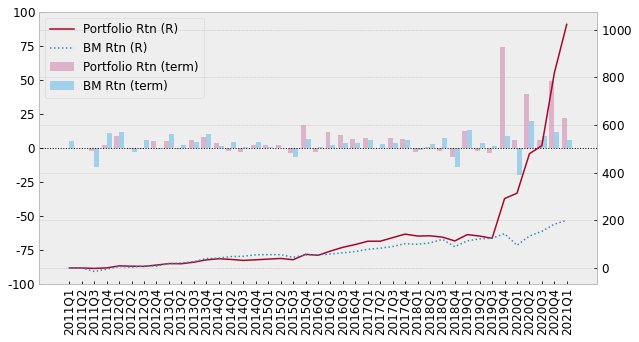

In [238]:
fs.draw_return(df)

In [239]:
for k, v in signal.items():
    print(k, len(v))

2010Q4 0
2011Q1 3
2011Q2 15
2011Q3 11
2011Q4 8
2012Q1 15
2012Q2 11
2012Q3 14
2012Q4 10
2013Q1 10
2013Q2 9
2013Q3 6
2013Q4 7
2014Q1 8
2014Q2 8
2014Q3 7
2014Q4 7
2015Q1 8
2015Q2 10
2015Q3 12
2015Q4 9
2016Q1 15
2016Q2 10
2016Q3 16
2016Q4 7
2017Q1 14
2017Q2 14
2017Q3 9
2017Q4 9
2018Q1 10
2018Q2 12
2018Q3 18
2018Q4 19
2019Q1 18
2019Q2 24
2019Q3 24
2019Q4 30
2020Q1 30
2020Q2 30
2020Q3 22
2020Q4 16


In [240]:
signal['2020Q3']

['QD',
 'IBKR',
 'XYF',
 'CGA',
 'APWC',
 'ACR',
 'MITT',
 'TRTX',
 'HALL',
 'YRD',
 'SECO',
 'SISI',
 'NVFY',
 'RCEL',
 'GURE',
 'VIRX',
 'FENG',
 'GOVX',
 'RELL',
 'LMFA',
 'HAPP',
 'MSN']

CAGR: 27.32%
Accumulated return: 1021.61%
Investment period: 10.0yrs
Sharpe ratio: 3.33
MDD: -11.85%


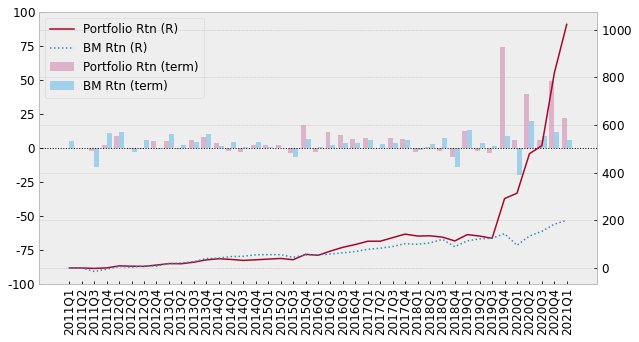

In [241]:
# Safety Margin
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms: 
    data[t]['NCAV'] = data[t]['Current Assets'] - data[t]['Total Liabilities']
    data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares']
    data[t]['Safety Margin'] = data[t]['NCAV'] - data[t]['Market Cap']*1.5
    s[t] = fs.fn_filter(data[t], by='Safety Margin', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [242]:
# 5.10 PEG

In [258]:
df = fs.fn_single(otp=MyOtp, symbol='AAPL', window='T')

In [259]:
df.to_csv('aap.csv')

In [260]:
df['PER'] = df['Price'] / df['EPS']

In [261]:
df['EPS Growth'] = ( df['EPS'] - df['EPS'].shift(4) ) / abs(df['EPS'].shift(4)) * 100
df['PEG'] = ( df['Price'] / df['EPS'] ) / df['EPS Growth']

In [262]:
print(df[['EPS', 'EPS Growth', 'PER', 'PEG']].tail(10))

            EPS  EPS Growth   PER    PEG
2019-09-30 2.98       -0.25 18.76 -74.84
2019-12-31 3.19        3.99 23.01   5.76
2020-03-31 3.22        7.34 19.76   2.69
2020-06-30 3.32       12.26 27.47   2.24
2020-09-30 3.30       10.47 35.12   3.35
2020-12-31 3.72       16.54 35.69   2.16
2021-03-31 4.47       39.01 27.31   0.70
2021-06-30 5.12       54.22 26.75   0.49
2021-09-30 5.62       70.43 25.18   0.36
2021-12-31 6.04       62.47 29.40   0.47


In [263]:
df = fs.fn_single(otp=MyOtp, symbol='AMZN', window='T')
df['PER'] = df['Price'] / df['EPS']
df['EPS Growth'] = ( df['EPS'] - df['EPS'].shift(4) ) / abs(df['EPS'].shift(4)) * 100
df['PEG'] = df['PER'] / df['EPS Growth']
print(df[['EPS','EPS Growth','PER', 'PEG']].tail(10))

             EPS  EPS Growth    PER   PEG
2019-09-30 23.05       25.75  75.31  2.92
2019-12-31 23.45       13.50  78.80  5.84
2020-03-31 21.30      -13.20  91.54 -6.93
2020-06-30 26.48        7.42 104.19 14.03
2020-09-30 34.80       50.98  90.48  1.77
2020-12-31 42.30       80.38  77.00  0.96
2021-03-31 53.01      148.87  58.37  0.39
2021-06-30 57.64      117.67  59.68  0.51
2021-09-30 51.14       46.95  64.24  1.37
2021-12-31 64.82       53.24  51.44  0.97


In [248]:
# PEG
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp=MyOtp, term=t) 
s = {}
signal = {}
for t in terms:
    t_4 = fs.quarters_before(terms, t, 4)
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
    data[t]['EPS Growth'] = ( data[t]['EPS'] - data[t_4]['EPS'] ) / abs(data[t_4]['EPS'])
    data[t]['PEG'] = data[t]['PER'] / data[t]['EPS Growth']
    data[t].loc[(data[t]['PER']<=0) | (data[t]['EPS Growth']<=0), 'PEG'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='PEG', floor=.1, cap=1, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 4.37%
Accumulated return: 53.38%
Investment period: 10.0yrs
Sharpe ratio: 0.26
MDD: -39.83%


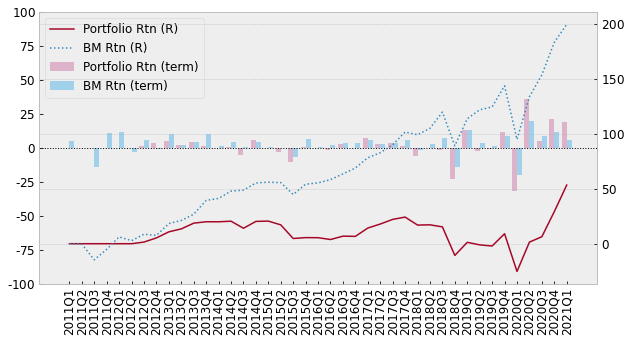

In [249]:
fs.draw_return(df)